<a href="https://colab.research.google.com/github/Punam105/stock_prediction/blob/main/stock_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 8s 50ms/step - loss: 0.0171
Epoch 2/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - loss: 4.3326e-04
Epoch 3/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 4.0675e-04
Epoch 4/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 4.0713e-04
Epoch 5/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 3.9903e-04
Epoch 6/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 3.4546e-04
Epoch 7/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 3.4383e-04
Epoch 8/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 2.7637e-04
Epoch 9/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 2.8624e-04
Epoch 10/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 2.4288e-04
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


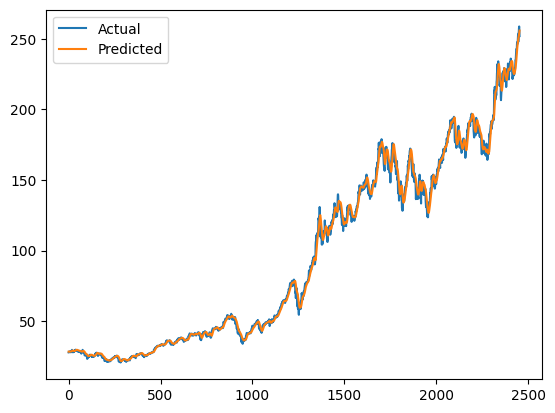

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt


data = yf.download('AAPL', start='2015-01-01', end='2024-12-31')
close_prices = data['Close'].values.reshape(-1, 1)


scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(close_prices)


X, y = [], []
for i in range(60, len(scaled_data)):
    X.append(scaled_data[i-60:i])
    y.append(scaled_data[i])
X, y = np.array(X), np.array(y)


model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X, y, epochs=10, batch_size=32)


predicted = model.predict(X)
predicted = scaler.inverse_transform(predicted)

plt.plot(close_prices[60:], label='Actual')
plt.plot(predicted, label='Predicted')
plt.legend()
plt.show()


In [ ]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load dataset
boston = load_boston()
X = boston.data
y = boston.target

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)
print("MSE:", mean_squared_error(y_test,y_pred))


ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>
